Dataset limpio cargado. Distribución de clases:
sentiment_label
2    0.376887
1    0.366320
0    0.256793
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.4071 - loss: 1.0566 - val_accuracy: 0.4317 - val_loss: 1.3043
Epoch 2/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.5978 - loss: 0.8367 - val_accuracy: 0.6082 - val_loss: 0.7957
Epoch 3/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.7138 - loss: 0.6464 - val_accuracy: 0.6976 - val_loss: 0.6960
Epoch 4/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.7377 - loss: 0.6089 - val_accuracy: 0.6992 - val_loss: 0.7215
Epoch 5/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.7967 - loss: 0.4918 - val_accuracy: 0.6687 - val_loss: 0.7675
Epoch 6/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.8103 - loss: 0.4581 - val_accuracy: 0.7320 - val_loss: 0.6661
Epoch 7/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.8246 - loss: 0.4298 - val_accuracy: 0.6160 - val_loss: 0.8068
Epoch 8/40
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.8242 - loss: 0.4156 - 

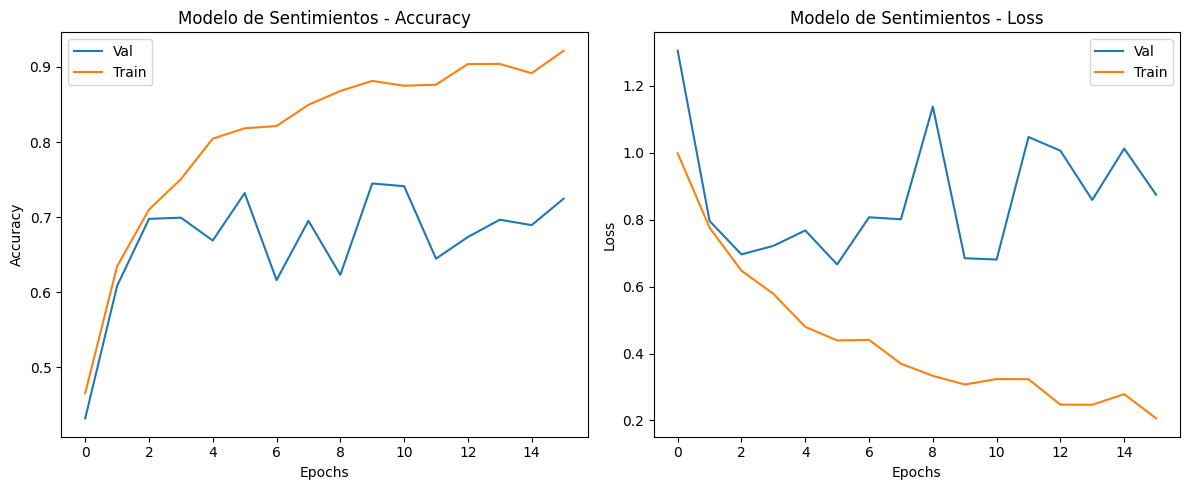


--- Evaluación del Modelo: Modelo de Sentimiento ---
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

negative (0)       0.63      0.88      0.74      1157
 neutral (1)       0.72      0.64      0.68      1650
positive (2)       0.85      0.70      0.77      1698

    accuracy                           0.73      4505
   macro avg       0.73      0.74      0.73      4505
weighted avg       0.74      0.73      0.73      4505


Accuracy: 0.7263
Precision: 0.7431
Recall: 0.7263
F1-Score: 0.7261
Cohen's Kappa: 0.5913


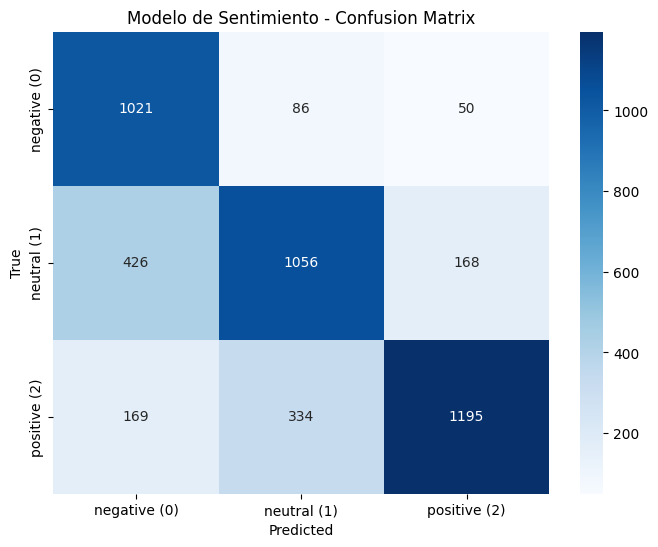


Ejemplo de predicción: "This game was intense and exciting!"
Sentimiento: positive (81.54% confianza)


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, History

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, cohen_kappa_score, confusion_matrix,
                             classification_report)

MAX_WORDS = 50000
MAX_LEN = 100
EMBEDDING_DIM = 150
EPOCHS = 40
BATCH_SIZE = 64
TARGET_NAMES = ['negative (0)', 'neutral (1)', 'positive (2)']
SENTIMENT_MAP_INV = {0: 'negative', 1: 'neutral', 2: 'positive'}

def plot_history(history: History, title: str):
    if not isinstance(history, History):
        print(f"Advertencia: No se pudo graficar historial para '{title}'.")
        return

    plt.figure(figsize=(12, 5))
    for i, metric in enumerate(['accuracy', 'loss']):
        plt.subplot(1, 2, i+1)
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label='Val')
        if metric in history.history:
            plt.plot(history.history[metric], label='Train')
        plt.title(f'{title} - {metric.capitalize()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, target_names, title: str):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_model(model, X_test, y_test, target_names, model_name: str):
    print(f"\n--- Evaluación del Modelo: {model_name} ---")
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")

    plot_confusion_matrix(y_test, y_pred, target_names, model_name)
    return y_test, y_pred

def predict_sentiment(text: str, model, tokenizer: Tokenizer, max_len: int = MAX_LEN):
    if not text.strip():
        return "desconocido", 0.0

    sequence = tokenizer.texts_to_sequences([text.lower()])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded, verbose=0)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class]
    return SENTIMENT_MAP_INV.get(predicted_class, "desconocido"), confidence

file_path = 'fifa_tweets_clean.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo: {file_path}")

df = pd.read_csv(file_path)
df = df[df['sentiment_label'] != -1].dropna(subset=['test_clean', 'sentiment_label'])

print("Dataset limpio cargado. Distribución de clases:")
print(df['sentiment_label'].value_counts(normalize=True))

texts = df['test_clean'].astype(str).tolist()
labels = df['sentiment_label'].astype(int).values
num_classes = len(np.unique(labels))

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = pad_sequences(tokenizer.texts_to_sequences(texts), maxlen=MAX_LEN)
y = labels

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    GlobalAveragePooling1D(),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ENTRENAMIENTO
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stop],
                    verbose=1)

# EVALUATION
plot_history(history, "Modelo de Sentimientos")
y_true, y_pred = evaluate_model(model, X_test, y_test, TARGET_NAMES, "Modelo de Sentimiento")

# EJEMPLO DE PREDICCIÓN
ejemplo = "This game was intense and exciting!"
sentimiento, confianza = predict_sentiment(ejemplo, model, tokenizer)
print(f"\nEjemplo de predicción: \"{ejemplo}\"")
print(f"Sentimiento: {sentimiento} ({confianza:.2%} confianza)")
